<a href="https://colab.research.google.com/github/vitroid/CoverByCycles/blob/main/COlike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CO-like molecule

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: RuntimeWarning: divide by zero encountered in true_divide


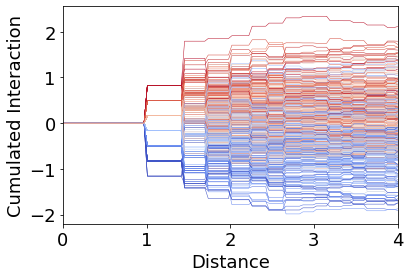

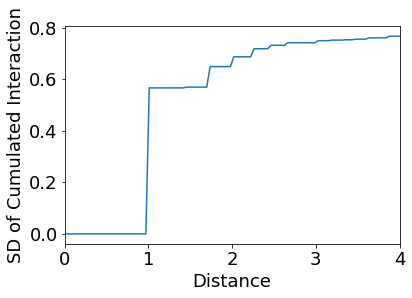

In [30]:
%matplotlib inline

from mpl_toolkits.axes_grid.inset_locator import inset_axes
import matplotlib
matplotlib.rc('pdf', fonttype=42)
matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'],'size':18})
import matplotlib.cm as cm
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
import numpy as np


# NN distance is 1
DL = np.array([[0,0,0],[0,1,1],[1,1,0],[1,0,1]], dtype=float) / 2**0.5
DA = np.array([[+1,+1,+1],[+1,-1,+1],[-1,+1,+1],[+1,+1,-1],], dtype=float) / (3**0.5*3)

def CO_crystal(N):
    coms = []
    oris = []
    for x in range(N):
        for y in range(N):
            for z in range(N):
                origin = np.array([x,y,z], dtype=float) * 2**0.5
                for i in range(4):
                    coms.append(origin + DL[i])
                    oris.append(DA[i])
    return np.array(coms), np.array(oris)

NN=8
coms, oris = CO_crystal(NN)
cell = np.array([NN,NN,NN], dtype=float) * 2**0.5
cellmat = np.diag(cell)
coms /= cell # relative

equalspacing = np.linspace(0, NN/2, 100)

oSs = np.zeros_like(equalspacing)
oSss = np.zeros_like(equalspacing)
cnt = 0

fig = plt.figure()

d_e = []


for i in range(400):
    center = 0
    d = coms - coms[0]
    d -= np.floor(d + 0.5)
    D = d @ cellmat
    L = np.linalg.norm(D, axis=1)
    D1 = D + oris 
    D2 = D - oris
    R  = np.random.randint(2, size=coms.shape[0])*2-1 # +1/-1
    R[0] = +1 # always
    I = R[0]*R / np.linalg.norm(D1[0] - D1, axis=1)
    I+=-R[0]*R / np.linalg.norm(D2[0] - D1, axis=1)
    I+= R[0]*-R / np.linalg.norm(D1[0] - D2, axis=1)
    I+=-R[0]*-R / np.linalg.norm(D2[0] - D2, axis=1)
    order = np.argsort(L)
    I[0] = 0
    oL = L[order]
    oI = I[order]
    oS = np.cumsum(oI)
    for j in range(oSs.shape[0]):
        v = oS[oL < equalspacing[j]]
        if v.shape[0] > 0:
            v = v[-1]
        else:
            v = 0
        oSs[j] = v
        oSss[j] += v**2
    cnt += 1
    # steppify
    y = interp1d(oL, oS, kind='previous')
    d_e.append(y)

# 距離1.1でのエネルギーの値でソートする。

N = len(d_e)
e4 = np.zeros(N)
for i, y in enumerate(d_e):
    e4[i] = y(1.1)
order = np.argsort(e4)
redro = [0]*N
for i in range(N):
    redro[order[i]] = i
for i in range(N):
    j = redro[i]
    plt.plot(equalspacing, d_e[i](equalspacing), color=cm.coolwarm(j/N), lw=0.5)


plt.xlabel("Distance")
plt.ylabel("Cumulative Interaction")
plt.xlim(0,NN/2)
fig.savefig("CO.pdf", bbox_inches='tight')
plt.show()
oSs /= cnt
oSss /= cnt
SD = (oSss - oSs**2)**0.5
fig = plt.figure()
plt.plot(equalspacing, SD)
plt.xlabel("Distance")
plt.ylabel("SD of Cumulative Interaction")
plt.xlim(0,NN/2)
fig.savefig("CO-SD.pdf", bbox_inches='tight')




In [6]:
! pip install yaplotlib

In [16]:
import yaplotlib as yp

N=2
coms, oris = CO_crystal(2)
cell = np.array([N,N,N], dtype=float)
cellmat = np.diag(cell)

s = ""
for i in range(coms.shape[0]):
    com = coms[i]
    ori = oris[i]
    e = ori / np.linalg.norm(ori)
    s += yp.Size(0.05)
    s += yp.Circle(com+ori)
    s += yp.Circle(com-ori)
    s += yp.Line(com+ori-e*0.05, com-ori+e*0.05)
    s += yp.Size(0.01)
    s += yp.Circle(com)

with open("CO.yap", "w") as f:
    f.write(s)
